In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [41]:
df=pd.read_csv("ecommerce_data.csv",encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-11 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


# 1. Perform Basic EDA
# a. Boxplot – All Numeric Variables 

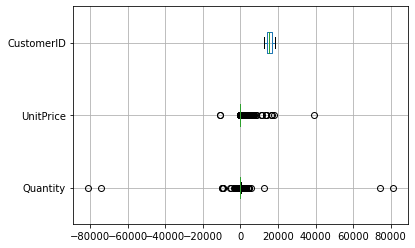

In [4]:
df[['InvoiceNo','StockCode','Quantity','UnitPrice','CustomerID']].plot.box(vert = False, grid = True);

# b. Histogram – All Numeric Variables 

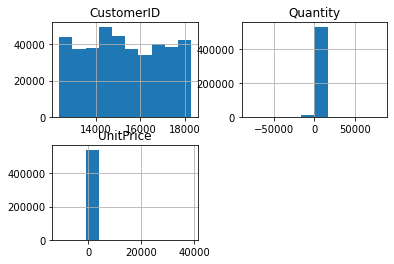

In [5]:
df.hist();

# c. Distribution Plot – All Numeric Variables 

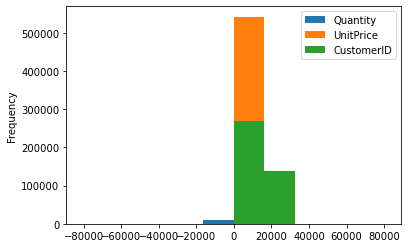

In [6]:
df[['Quantity','UnitPrice','CustomerID']].plot.hist();

# d. Aggregation for all numerical Columns

In [7]:
df.aggregate({"Quantity":['sum','min','max'],
             "UnitPrice":['sum','min','max'],
             "CustomerID":['sum','min','max'], 
             })


,Quantity,UnitPrice,CustomerID
sum,5176450,2498803.974,6.219476e+09
min,-80995,-11062.060,1.234600e+04
max,80995,38970.000,1.828700e+04


# e. Unique Values across all columns

In [8]:
value=df[['Quantity','UnitPrice','CustomerID']].values
valuex= np.unique(value)
print(valuex)


[-80995.   -74215.   -11062.06 ...       nan       nan       nan]


# f. Duplicate values across all columns 

In [9]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12-01-10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12-01-10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12-01-10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12-01-10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12-01-10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12-09-11 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12-09-11 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12-09-11 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12-09-11 11:34,2.10,14446.0,United Kingdom


# g. Correlation – Heatmap - All Numeric Variables

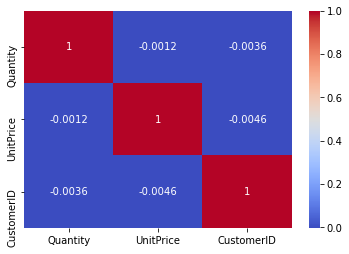

In [10]:
corr=df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True);


# h. Regression Plot - All Numeric Variables

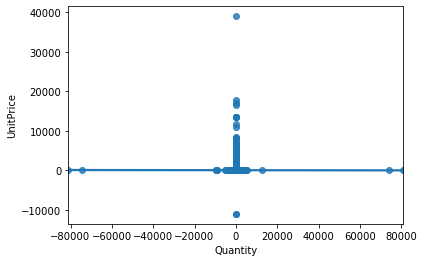

In [12]:
sns.regplot(x='Quantity',y='UnitPrice',ci=None,data=df);

# i. Bar Plot – Every Categorical Variable vs every Numerical Variable 

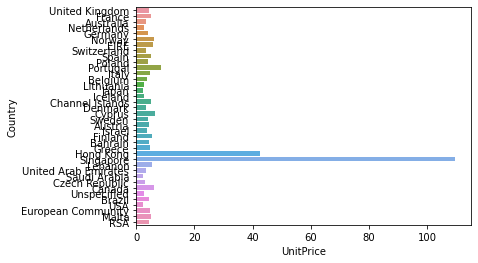

In [14]:
sns.barplot(y='Country',x='UnitPrice',ci=None,data=df);

# j. Pair plot - All Numeric Variables 

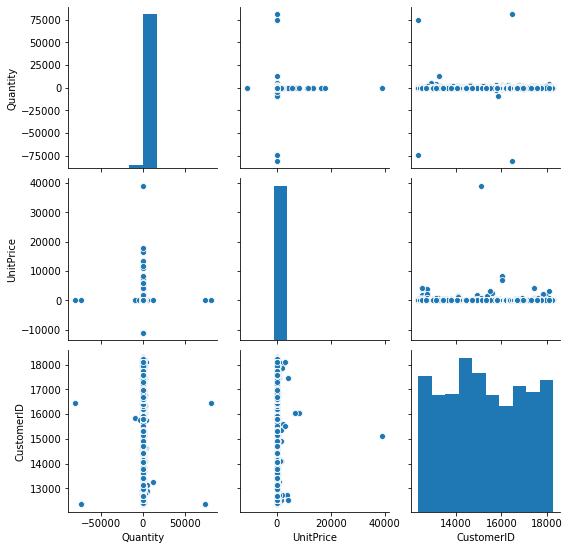

In [15]:
sns.pairplot(df)

# k. Line chart to show the trend of data - All Numeric/Date Variables 


Text(0, 0.5, 'UnitPrice')

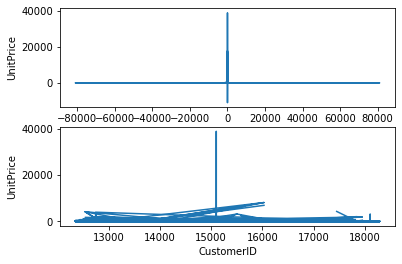

In [16]:
plt.subplot(2,1,1)
plt.plot(df['Quantity'],df['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.subplot(2,1,2)
plt.plot(df['CustomerID'],df['UnitPrice'])
plt.xlabel('CustomerID')
plt.ylabel('UnitPrice')


# l. Plot the skewness - All Numeric Variables

In [17]:
df.skew()

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
dtype: float64

# 2. Check for missing values in all columns and replace them with the appropriate metric
(Mean/Median/Mode) 

In [18]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [19]:
df['CustomerID'].fillna((df['CustomerID'].mean()))

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

# 3. Remove duplicate rows

In [20]:
df.drop_duplicates(subset ='Description',keep = False,inplace = True)
df.Description


107                       GIRLY PINK TOOL SET
1985             PORCELAIN HANGING BELL SMALL
2313      PINK MARSHMALLOW SCARF KNITTING KIT
3414             CAKESTAND, 3 TIER, LOVEHEART
3415                     GLASS BELL JAR SMALL
                         ...                 
527065              LETTER "U" BLING KEY RING
532723                                    wet
532724                              wet boxes
535327                        ????damages????
535335                                   lost
Name: Description, Length: 308, dtype: object

# 4. Remove rows which have negative values in Quantity column 


In [21]:
df = df[(df['Quantity'] >=0)| (df['Quantity'].isnull())]
print(df)


       InvoiceNo StockCode                          Description  Quantity  \
107       536381     84854                  GIRLY PINK TOOL SET         5   
2313      536576     82615  PINK MARSHMALLOW SCARF KNITTING KIT        36   
3414      536627     22776         CAKESTAND, 3 TIER, LOVEHEART         2   
3415      536627     22778                 GLASS BELL JAR SMALL         4   
3416      536627     22777                 GLASS BELL JAR LARGE         2   
...          ...       ...                                  ...       ...   
501156    578824     84550       CROCHET LILAC/RED BEAR KEYRING         1   
502046    578833    84971l          LARGE HEART FLOWERS HOOK            2   
507867    579187     23609       SET 10 CARDS SNOWY ROBIN 17099         1   
512588    579512     23617  SET 10 CARDS SWIRLY XMAS TREE 17104         2   
527065    580691    90214U            LETTER "U" BLING KEY RING        12   

             InvoiceDate  UnitPrice  CustomerID         Country  
107      

# 5. Add the columns - Month, Day and Hour for the invoice

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']


<ipython-input-22-3b4cc16332eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


107      2010-12-01 09:41:00
2313     2010-12-01 16:11:00
3414     2010-12-02 10:53:00
3415     2010-12-02 10:53:00
3416     2010-12-02 10:53:00
                 ...        
501156   2011-11-25 14:02:00
502046   2011-11-25 15:23:00
507867   2011-11-28 15:31:00
512588   2011-11-29 16:47:00
527065   2011-12-05 15:48:00
Name: InvoiceDate, Length: 194, dtype: datetime64[ns]

In [37]:
df['day']=df['InvoiceDate'].dt.day
df['month']=df['InvoiceDate'].dt.month
df['year']=df['InvoiceDate'].dt.year
df['hour']=df['InvoiceDate'].dt.year
df


<ipython-input-37-5b3e67e92523>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day']=df['InvoiceDate'].dt.day
<ipython-input-37-5b3e67e92523>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['InvoiceDate'].dt.month
<ipython-input-37-5b3e67e92523>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,amount_spent,hour
107,536381,84854,GIRLY PINK TOOL SET,5,2010-12-01 09:41:00,4.95,15311.0,United Kingdom,1,12,2010,24.75,2010
2313,536576,82615,PINK MARSHMALLOW SCARF KNITTING KIT,36,2010-12-01 16:11:00,2.55,13777.0,United Kingdom,1,12,2010,91.80,2010
3414,536627,22776,"CAKESTAND, 3 TIER, LOVEHEART",2,2010-12-02 10:53:00,9.95,15658.0,United Kingdom,2,12,2010,19.90,2010
3415,536627,22778,GLASS BELL JAR SMALL,4,2010-12-02 10:53:00,3.95,15658.0,United Kingdom,2,12,2010,15.80,2010
3416,536627,22777,GLASS BELL JAR LARGE,2,2010-12-02 10:53:00,8.50,15658.0,United Kingdom,2,12,2010,17.00,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501156,578824,84550,CROCHET LILAC/RED BEAR KEYRING,1,2011-11-25 14:02:00,1.65,17883.0,United Kingdom,25,11,2011,1.65,2011
502046,578833,84971l,LARGE HEART FLOWERS HOOK,2,2011-11-25 15:23:00,2.46,NaN,United Kingdom,25,11,2011,4.92,2011
507867,579187,23609,SET 10 CARDS SNOWY ROBIN 17099,1,2011-11-28 15:31:00,2.91,NaN,United Kingdom,28,11,2011,2.91,2011
512588,579512,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2,2011-11-29 16:47:00,2.91,NaN,United Kingdom,29,11,2011,5.82,2011


# 6. How many orders made by the customers? 

In [26]:
ef=df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()
print(ef)


   CustomerID         Country  InvoiceNo
0     12377.0     Switzerland          2
1     12567.0          France          1
2     12725.0           Italy          1
3     12748.0  United Kingdom          1
4     12783.0        Portugal          1


# 7. TOP 5 customers with higher number of orders 

In [42]:
print('The TOP 5 customers with most number of orders...')
ef.sort_values(by='InvoiceNo', ascending=False).head()


The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
0,12377.0,Switzerland,2
1,12567.0,France,1
2,12725.0,Italy,1
3,12748.0,United Kingdom,1
4,12783.0,Portugal,1


# 8. How much money spent by the customers?

In [44]:
df['amount_spent'] = df['Quantity'] * df['UnitPrice']

In [32]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['amount_spent'].sum()
print(money_spent)


    CustomerID         Country  amount_spent
0      12377.0     Switzerland         67.20
1      12567.0          France        171.80
2      12725.0           Italy         11.90
3      12748.0  United Kingdom          1.25
4      12783.0        Portugal         17.70
..         ...             ...           ...
86     18014.0  United Kingdom          1.65
87     18018.0  United Kingdom         29.95
88     18043.0  United Kingdom          4.65
89     18110.0  United Kingdom          0.95
90     18196.0  United Kingdom          2.10

[91 rows x 3 columns]


# TOP 5 customers with highest money spent

In [33]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()



The TOP 5 customers with highest money spent...


,CustomerID,Country,amount_spent
18,14156.0,EIRE,2234.65
44,15299.0,United Kingdom,527.85
1,12567.0,France,171.80
68,16915.0,United Kingdom,149.85
50,15502.0,United Kingdom,119.60


# 10. How many orders per month?

In [34]:
ax = df.groupby('InvoiceDate')['month'].unique().value_counts().sort_index()
print(ax)


[1]      8
[2]      8
[3]     13
[4]      7
[5]     13
[6]      8
[7]     13
[8]      7
[9]     11
[10]    17
[11]    17
[12]    52
Name: month, dtype: int64


# 11. How many orders per day? 

In [35]:
ax = df.groupby('InvoiceDate')['day'].unique().value_counts().sort_index()
print(ax)

[1]      6
[2]      5
[3]      5
[4]      3
[5]      9
[6]     12
[7]      9
[8]      3
[9]      2
[10]     5
[11]     7
[12]     5
[13]    10
[14]    11
[15]     8
[16]     7
[17]     7
[18]     7
[19]     6
[20]     4
[21]     4
[22]     3
[23]     3
[24]     6
[25]     6
[26]     2
[27]     6
[28]     6
[29]     1
[30]     1
[31]     5
Name: day, dtype: int64


In [38]:
ax = df.groupby('InvoiceDate')['hour'].unique().value_counts().sort_index()
print(ax)

[2010]     51
[2011]    123
Name: hour, dtype: int64


# 13. How many orders for each country? 

In [39]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
print(group_country_orders)


Country
France              1
Italy               1
Lithuania           1
Portugal            1
Switzerland         2
Netherlands         3
EIRE                9
United Kingdom    176
Name: InvoiceNo, dtype: int64


# . How much money spent by each country? 

In [45]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['amount_spent'].sum()
print(money_spent)


      CustomerID         Country  amount_spent
0        12346.0  United Kingdom          0.00
1        12347.0         Iceland       4310.00
2        12348.0         Finland       1797.24
3        12349.0           Italy       1757.55
4        12350.0          Norway        334.40
...          ...             ...           ...
4375     18280.0  United Kingdom        180.60
4376     18281.0  United Kingdom         80.82
4377     18282.0  United Kingdom        176.60
4378     18283.0  United Kingdom       2094.88
4379     18287.0  United Kingdom       1837.28

[4380 rows x 3 columns]
